<a href="https://colab.research.google.com/github/mahir1995/Malaria-Detection/blob/master/Malaria_Detection_using_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria Detection

## Download data

In [1]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 327M/337M [00:03<00:00, 99.7MB/s]
100% 337M/337M [00:03<00:00, 88.7MB/s]


In [0]:
!unzip cell-images-for-detecting-malaria.zip

## Import dependencies

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *

## Load dataset

In [0]:
path = Path('cell_images/')

In [18]:
!ls {path}

Parasitized  Uninfected


In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                 ds_tfms=get_transforms(flip_vert=True, max_warp=0), 
                                 size=224, bs=64).normalize(imagenet_stats)

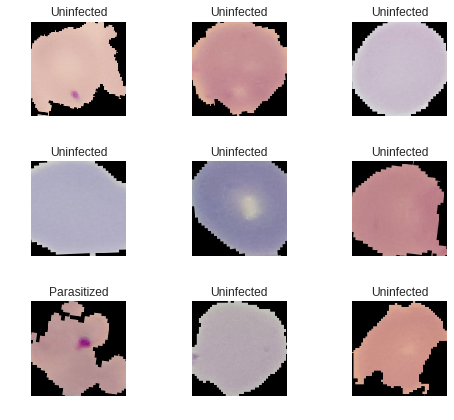

In [19]:
data.show_batch(rows=3, figsize=(7, 6))

## Create model

In [20]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 25620046.40it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03


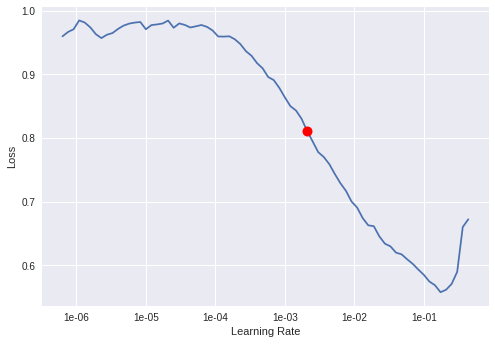

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2, 3e-3)

epoch,train_loss,valid_loss,accuracy
1,0.166731,0.123240,0.955362
2,0.128533,0.095483,0.965705


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


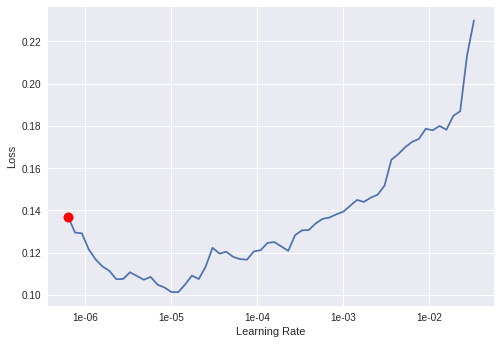

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,3e-4))

epoch,train_loss,valid_loss,accuracy
1,0.118534,0.087027,0.968245
2,0.111014,0.083111,0.972782


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

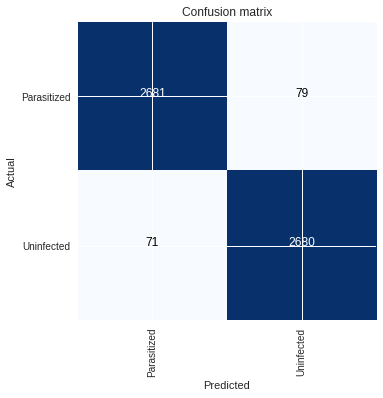

In [29]:
interp.plot_confusion_matrix()